### Produce a covariance plot for 20km radius pairs of gauges: FR, UC, HM, K, BV
### Transform P values  to uniform on range [0,1] by ranking and dividing by the number of values (experiment with different ranking 'methods'
### Jitter P values to eliminate tied values (we want each value to be unique before ranking them)
### Transform separation distances using scipy distance_matrix (or spatial.distance.cdist) to get them into a form that will work with the RM code

In [1]:
import numpy as np
import pandas as pd
import math
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance_matrix
from scipy.optimize import curve_fit
from numpy import genfromtxt

### Read in P data for all 8 stations from csv file created in P_inputs_2005-2016.ipynb

In [2]:
# Use pd.read_csv to read csv file
P_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\Pinputs_2005-2016.csv",
                         index_col=0)
# drop KP, BCS and WH
P_df = P_df.drop(["KP_p_mm", "BCS_p_mm", "WH_p_mm"], axis=1)
# P_df

### Generate a set of random numbers to jitter the P ts data then add them to each column in the dataframe

In [3]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html

jitter = np.random.default_rng().uniform(0, 0.0001, 4019) # random numbers are in range 0 to 0.0001
# jitter
P_df['jitter'] = np.array(jitter)
# P_df
P_df['FR_p_mm_jit'] = P_df['FR_p_mm'] + P_df['jitter']
P_df['UC_p_mm_jit'] = P_df['UC_p_mm'] + P_df['jitter']
P_df['HM_p_mm_jit'] = P_df['HM_p_mm'] + P_df['jitter']
P_df['K_p_mm_jit'] = P_df['K_p_mm'] + P_df['jitter']
P_df['BV_p_mm_jit'] = P_df['BV_p_mm'] + P_df['jitter']
P_df

,FR_p_mm,UC_p_mm,HM_p_mm,K_p_mm,BV_p_mm,jitter,FR_p_mm_jit,UC_p_mm_jit,HM_p_mm_jit,K_p_mm_jit,BV_p_mm_jit
date,,,,,,,,,,,
2005-10-01,16.0160,11.3028,7.3722,0.0,10.4,0.000057,16.016057,11.302857,7.372257,0.000057,10.400057
2005-10-02,0.0000,0.0000,0.0000,0.4,0.0,0.000064,0.000064,0.000064,0.000064,0.400064,0.000064
2005-10-03,0.7649,0.5399,0.0000,1.2,0.2,0.000073,0.764973,0.539973,0.000073,1.200073,0.200073
2005-10-04,0.5463,0.3855,0.0000,0.0,0.4,0.000093,0.546393,0.385593,0.000093,0.000093,0.400093
2005-10-05,0.0896,0.0633,0.0000,0.0,0.0,0.000003,0.089603,0.063303,0.000003,0.000003,0.000003
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-27,0.9676,0.0000,0.0000,0.0,0.0,0.000095,0.967695,0.000095,0.000095,0.000095,0.000095
2016-09-28,0.0894,0.0000,0.0000,0.0,0.0,0.000066,0.089466,0.000066,0.000066,0.000066,0.000066
2016-09-29,0.0000,0.0000,0.0000,0.0,0.0,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028


### Transform P values for each station to uniform values on range 0 to 1.

In [4]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rankdata.html
P_df["FR_p_unijit"] = (st.rankdata(P_df.FR_p_mm_jit) - 0.5) / (len(P_df))
P_df["UC_p_unijit"] = (st.rankdata(P_df.UC_p_mm_jit) - 0.5) / (len(P_df))
P_df["HM_p_unijit"] = (st.rankdata(P_df.HM_p_mm_jit) - 0.5) / (len(P_df))
P_df["K_p_unijit"] = (st.rankdata(P_df.K_p_mm_jit) - 0.5) / (len(P_df))
P_df["BV_p_unijit"] = (st.rankdata(P_df.BV_p_mm_jit) - 0.5) / (len(P_df))
P_df

,FR_p_mm,UC_p_mm,HM_p_mm,K_p_mm,BV_p_mm,jitter,FR_p_mm_jit,UC_p_mm_jit,HM_p_mm_jit,K_p_mm_jit,BV_p_mm_jit,FR_p_unijit,UC_p_unijit,HM_p_unijit,K_p_unijit,BV_p_unijit
date,,,,,,,,,,,,,,,,
2005-10-01,16.0160,11.3028,7.3722,0.0,10.4,0.000057,16.016057,11.302857,7.372257,0.000057,10.400057,0.957079,0.957328,0.945633,0.386788,0.920503
2005-10-02,0.0000,0.0000,0.0000,0.4,0.0,0.000064,0.000064,0.000064,0.000064,0.400064,0.000064,0.266609,0.297462,0.370863,0.707265,0.365887
2005-10-03,0.7649,0.5399,0.0000,1.2,0.2,0.000073,0.764973,0.539973,0.000073,1.200073,0.200073,0.608236,0.659990,0.423115,0.767479,0.607738
2005-10-04,0.5463,0.3855,0.0000,0.0,0.4,0.000093,0.546393,0.385593,0.000093,0.000093,0.400093,0.575392,0.632620,0.527619,0.618935,0.633367
2005-10-05,0.0896,0.0633,0.0000,0.0,0.0,0.000003,0.089603,0.063303,0.000003,0.000003,0.000003,0.435307,0.481587,0.021772,0.024757,0.019035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-27,0.9676,0.0000,0.0000,0.0,0.0,0.000095,0.967695,0.000095,0.000095,0.000095,0.000095,0.627644,0.441279,0.540060,0.634859,0.539064
2016-09-28,0.0894,0.0000,0.0000,0.0,0.0,0.000066,0.089466,0.000066,0.000066,0.000066,0.000066,0.434810,0.304429,0.381811,0.446255,0.376089
2016-09-29,0.0000,0.0000,0.0000,0.0,0.0,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.119557,0.134984,0.163847,0.195447,0.160363


In [5]:
# have a look at max and min ranked values
print("FR_p_uniform max = ", round(P_df.FR_p_unijit.max(), 5))
print("FR_p_uniform min = ", round(P_df.FR_p_unijit.min(), 5))
print("UC_p_uniform max = ", round(P_df.UC_p_unijit.max(), 5))
print("UC_p_uniform min = ", round(P_df.UC_p_unijit.min(), 5))
print("HM_p_uniform max = ", round(P_df.HM_p_unijit.max(), 5))
print("HM_p_uniform min = ", round(P_df.HM_p_unijit.min(), 5))
print("K_p_uniform max = ", round(P_df.K_p_unijit.max(), 5))
print("K_p_uniform min = ", round(P_df.K_p_unijit.min(), 5))
print("BV_p_uniform max = ", round(P_df.BV_p_unijit.max(), 5))
print("BV_p_uniform min = ", round(P_df.BV_p_unijit.min(), 5))

FR_p_uniform max =  0.99988
FR_p_uniform min =  0.00012
UC_p_uniform max =  0.99988
UC_p_uniform min =  0.00012
HM_p_uniform max =  0.99988
HM_p_uniform min =  0.00012
K_p_uniform max =  0.99988
K_p_uniform min =  0.00012
BV_p_uniform max =  0.99988
BV_p_uniform min =  0.00012


### Plot a histogram for the jittered values to see the shape of the distribution

In [6]:
# x = np.linspace(0, max(P_df.FR_p_unijit), 100)
# # x = np.linspace(0, 1, 100)
# y = P_df.FR_p_unijit
# # histogram
# P_df.FR_p_unijit.plot(kind='hist', bins=50, density=True, color='lightgrey', label='precipitation histogram')

### I was going to try to transform P values for each station using different st.rankdata methods but, as jittering has given me a unique value for each time step, I don't really need to do that right now.

### Calculate covariance for each gauge pair

### Pair 1: Fisera Ridge (2325 m) & Upper Clearing (1845 m)

In [7]:
FRUCcov = P_df["FR_p_unijit"].cov(P_df["UC_p_unijit"])
print("FRUCcov = ", FRUCcov.round(5))
# P_df.plot.scatter(x='FR_p_uniform', y='UC_p_uniform', c='tab:blue',
#                                title="Fisera Ridge (2325 m) v Upper Clearing (1846 m)")
#                                label="FR v UC cov = 0.0675")
# plt.grid()
# plt.xlabel("Fisera Ridge uniform P")
# plt.ylabel("Upper Clearing uniform P")
# plt.show()
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRUCcorr2005-16.png')

FRUCcov =  0.07352


### Pair 2: Fisera Ridge (2325 m) & Hay Meadow (1436 m)

In [8]:
FRHMcov = P_df["FR_p_unijit"].cov(P_df["HM_p_unijit"])
print("FRHMcov = ", FRHMcov.round(5))
# P_df.plot.scatter(x='FR_p_mm', y='HM_p_mm', c='tab:orange',
#                                title="Fisera Ridge (2325 m) v Hay Meadow (1436 m)",
#                                label="FR v HM corr coeff = 0.0528")
# plt.grid()
# plt.xlabel("Fisera Ridge P (mm/d)")
# plt.ylabel("Hay Meadow P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRHMcorr2005-16.png')

FRHMcov =  0.06002


### Pair 3: Fisera Ridge (2325 m) & Kananaskis (1391 m)

In [9]:
FRKcov = P_df["FR_p_unijit"].cov(P_df["K_p_unijit"])
print("FRKcov = ", FRKcov.round(5))
# P_df.plot.scatter(x='FR_p_mm', y='K_p_mm', c='tab:brown',
#                                title="Fisera Ridge (2325 m) v Kananaskis (1391 m)",
#                                label="FR v K corr coeff = 0.599")
# plt.grid()
# plt.xlabel("Fisera Ridge P (mm/d)")
# plt.ylabel("Kananaskis P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRKcorr2005-16.png')


FRKcov =  0.04345


### Pair 4: Fisera Ridge (2325 m) & Bow Valley (1298 m)

In [10]:
FRBVcov = P_df["FR_p_unijit"].cov(P_df["BV_p_unijit"])
print("FRBVcov = ", FRBVcov.round(5))
# P_df.plot.scatter(x='FR_p_mm', y='BV_p_mm', c='tab:green',
#                                title="Fisera Ridge (2325 m) v Bow Valley (1298 m)",
#                                label="FR v BV corr coeff = 0.679")
# plt.grid()
# plt.xlabel("Fisera Ridge P (mm/d)")
# plt.ylabel("Bow Valley P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRBVcorr2005-16.png')

FRBVcov =  0.04523


### Pair 8: Upper Clearing (1845 m) & Hay Meadow (1436 m)

In [11]:
UCHMcov = P_df["UC_p_unijit"].cov(P_df["HM_p_unijit"])
print("UCHMcov = ", UCHMcov.round(5))
# P_df.plot.scatter(x='UC_p_mm', y='HM_p_mm', c='tab:gray',
#                                title="Upper Clearing (1845 m) v Hay Meadow (1436 m)",
#                                label="UC v HM corr coeff = 0.946")
# plt.grid()
# plt.xlabel("Upper Clearing P (mm/d)")
# plt.ylabel("Hay Meadow P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCHMcorr2005-16.png')

UCHMcov =  0.06553


### Pair 9: Upper Clearing (1845 m) & Kananaskis (1391 m)

In [12]:
UCKcov = P_df["UC_p_unijit"].cov(P_df["K_p_unijit"])
print("UCKcov = ", UCKcov.round(5))
# P_df.plot.scatter(x='UC_p_mm', y='K_p_mm', c='tab:olive',
#                                title="Upper Clearing (1845 m) v Kananaskis (1391 m)",
#                                label="UC v K corr coeff = 0.637")
# plt.grid()
# plt.xlabel("Upper Clearing P (mm/d)")
# plt.ylabel("Kananaskis P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCKcorr2005-16.png')

UCKcov =  0.04631


### Pair 10: Upper Clearing (1845 m) & Bow Valley (1298 m)

In [13]:
UCBVcov = P_df["UC_p_unijit"].cov(P_df["BV_p_unijit"])
print("UCBVcov = ", UCBVcov.round(5))
# P_df.plot.scatter(x='UC_p_mm', y='BV_p_mm', c='tab:cyan',
#                                title="Upper Clearing (1845 m) v Bow Valley (1298 m)",
#                                label="UC v BV corr coeff = 0.761")
# plt.grid()
# plt.xlabel("Upper Clearing P (mm/d)")
# plt.ylabel("Bow Valley P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCBVcorr2005-16.png')

UCBVcov =  0.04957


### Pair 14: Hay Meadow (1436 m) & Kananaskis (1391 m)

In [14]:
HMKcov = P_df["HM_p_unijit"].cov(P_df["K_p_unijit"])
print("HMKcov = ", HMKcov.round(5))
# P_df.plot.scatter(x='HM_p_mm', y='K_p_mm', c='goldenrod',
#                                title="Hay Meadow (1426 m) v Kananaskis (1391 m)",
#                                label="HM v K corr coeff = 0.651")
# plt.grid()
# plt.xlabel("Hay Meadow P (mm/d)")
# plt.ylabel("Kananaskis P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\HMKcorr2005-16.png')

HMKcov =  0.04909


### Pair 15: Hay Meadow (1436 m) & Bow Valley (1298 m)

In [15]:
HMBVcov = P_df["HM_p_unijit"].cov(P_df["BV_p_unijit"])
print("HMBVcov = ", HMBVcov.round(5))
# P_df.plot.scatter(x='HM_p_mm', y='BV_p_mm', c='olive',
#                                title="Hay Meadow (1426 m) v Bow Valley (1298 m)",
#                                label="HM v BV corr coeff = 0.764")
# plt.grid()
# plt.xlabel("Hay Meadow P (mm/d)")
# plt.ylabel("Bow Valley P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\HMBVcorr2005-16.png')

HMBVcov =  0.04958


### Pair 19: Kananaskis (1391 m) & Bow Valley (1298 m)

In [16]:
KBVcov = P_df["K_p_unijit"].cov(P_df["BV_p_unijit"])
print("KBVcov = ", KBVcov.round(5))
# P_df.plot.scatter(x='K_p_mm', y='BV_p_mm', c='steelblue',
#                                title="Kananaskis (1391 m) v Bow Valley (1298 m)",
#                                label="K v BV corr coeff = 0.682")
# plt.grid()
# plt.xlabel("Kananaskis P (mm/d)")
# plt.ylabel("Bow Valley P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\KBVcorr2005-16.png')

KBVcov =  0.04697


### Print all covariance values

In [17]:
print("Fisera Ridge Upper Clearing covariance =", FRUCcov.round(5))
print("Fisera Ridge Hay Meadow covariance =", FRHMcov.round(5))
print("Fisera Ridge Kananaskis covariance =", FRKcov.round(5))
print("Fisera Ridge Bow Valley covariance =", FRBVcov.round(5))
print("Upper Clearing Hay Meadow covariance =", UCHMcov.round(5))
print("Upper Clearing Kananaskis covariance =", UCKcov.round(5))
print("Upper Clearing Bow Valley covariance =", UCBVcov.round(5))
print("Hay Meadow Kananaskis covariance =", HMKcov.round(5))
print("Hay Meadow Bow Valley covariance =", HMBVcov.round(5))
print("Kananaskis Bow Valley covariance =", KBVcov.round(5))

Fisera Ridge Upper Clearing covariance = 0.07352
Fisera Ridge Hay Meadow covariance = 0.06002
Fisera Ridge Kananaskis covariance = 0.04345
Fisera Ridge Bow Valley covariance = 0.04523
Upper Clearing Hay Meadow covariance = 0.06553
Upper Clearing Kananaskis covariance = 0.04631
Upper Clearing Bow Valley covariance = 0.04957
Hay Meadow Kananaskis covariance = 0.04909
Hay Meadow Bow Valley covariance = 0.04958
Kananaskis Bow Valley covariance = 0.04697


### Use scipy.stats distance_matrix to calculate separation distances between stations. 

### Method 1: use standard xy grid coords from run_inv_mcrb.py

In [18]:
# standard xy grid coords from run_inv_mcrb.py
coords = [[69, 53], [72, 93], [45, 136], [235, 287], [357, 239]]
stations = ["Fisera Ridge", "Upper Clearing", "Hay Meadow", "Kananaskis", "Bow Valley"]
dist_df = pd.DataFrame(coords, columns = ["std grid x", "std grid y"], index = stations)
dist_df

,std grid x,std grid y
Fisera Ridge,69,53
Upper Clearing,72,93
Hay Meadow,45,136
Kananaskis,235,287
Bow Valley,357,239


### Method 2: use eastings and northings from MCRB_Pinputs_20km.csv

In [19]:
# # easting and northing coords from MCRB_Pinputs_20km.csv
# coords = [[626132, 5646467], [628147, 5646573], [630745, 5645258], [635104, 5654649], [635410, 5660866]]
# stations = ["Fisera Ridge", "Upper Clearing", "Hay Meadow", "Kananaskis", "Bow Valley"]
# dist_df = pd.DataFrame(coords, columns = ["std grid x", "std grid y"], index = stations)
# dist_df

### Calculate the distance matrix

In [20]:
distmatrix_df = pd.DataFrame(distance_matrix(dist_df.values, dist_df.values), index=dist_df.index, columns=dist_df.index)
distmatrix_df

,Fisera Ridge,Upper Clearing,Hay Meadow,Kananaskis,Bow Valley
Fisera Ridge,0.000000,40.112342,86.400231,286.900680,342.841071
Upper Clearing,40.112342,0.000000,50.774009,253.387056,320.220237
Hay Meadow,86.400231,50.774009,0.000000,242.695282,328.562018
Kananaskis,286.900680,253.387056,242.695282,0.000000,131.103013
Bow Valley,342.841071,320.220237,328.562018,131.103013,0.000000


### Get the separation distances from the matrix

In [21]:
FRUCdist = distmatrix_df.iloc[0, 1]
FRHMdist = distmatrix_df.iloc[0, 2]
FRKdist = distmatrix_df.iloc[0, 3]
FRBVdist = distmatrix_df.iloc[0, 4]
UCHMdist = distmatrix_df.iloc[1, 2]
UCKdist = distmatrix_df.iloc[1, 3]
UCBVdist = distmatrix_df.iloc[1, 4]
HMKdist = distmatrix_df.iloc[2, 3]
HMBVdist = distmatrix_df.iloc[2, 4]
KBVdist = distmatrix_df.iloc[3, 4]

print("FRUC sep dist = ", FRUCdist)
print("FRHM sep dist = ", FRHMdist)
print("FRK sep dist = ", FRKdist)
print("FRBV sep dist = ", FRBVdist)
print("UCHM sep dist = ", UCHMdist)
print("UCK sep dist = ", UCKdist)
print("UCBV sep dist = ", UCBVdist)
print("HMK sep dist = ", HMKdist)
print("HMBV sep dist = ", HMBVdist)
print("KBV sep dist = ", KBVdist)

FRUC sep dist =  40.11234224026316
FRHM sep dist =  86.40023148117139
FRK sep dist =  286.9006796785257
FRBV sep dist =  342.8410710518797
UCHM sep dist =  50.774009099144415
UCK sep dist =  253.38705570727168
UCBV sep dist =  320.22023671217283
HMK sep dist =  242.69528219559604
HMBV sep dist =  328.5620184987912
KBV sep dist =  131.10301293257908


### Create a dataframe

In [22]:
# step 1: initialise my lists
cov = [["FRUC", FRUCdist, FRUCcov], ["FRHM", FRHMdist, FRHMcov], ["FRK", FRKdist, FRKcov],
       ["FRBV", FRBVdist, FRBVcov], ["UCHM", UCHMdist, UCHMcov], ["UCK", UCKdist, UCKcov],
       ["UCBV", UCBVdist, UCBVcov], ["HMK", HMKdist, HMKcov], ["HMBV", HMBVdist, HMBVcov],
       ["KBV", KBVdist, KBVcov.round(5)]]
cov

[['FRUC', 40.11234224026316, 0.07352451441949322],
 ['FRHM', 86.40023148117139, 0.06002138447044437],
 ['FRK', 286.9006796785257, 0.04345087245761462],
 ['FRBV', 342.8410710518797, 0.04523322377649047],
 ['UCHM', 50.774009099144415, 0.06552660555345327],
 ['UCK', 253.38705570727168, 0.046306186517547414],
 ['UCBV', 320.22023671217283, 0.04956683648511755],
 ['HMK', 242.69528219559604, 0.049088113284515386],
 ['HMBV', 328.5620184987912, 0.04957870201342421],
 ['KBV', 131.10301293257908, 0.04697]]

In [23]:
# step 2: create df from lists
covariance_df = pd.DataFrame(cov, columns = ["station_pair", "separation_distance", "covariance"])
covariance_df.set_index("station_pair", inplace=True)
# covariance_df

In [24]:
# sort by separation distance
covariance_df.sort_values(by=['separation_distance'], inplace=True, ascending=True)
# write to csv
covariance_df.to_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\covariance\covariance_jittered_20km_stns.csv")

In [25]:
covariance_df

,separation_distance,covariance
station_pair,,
FRUC,40.112342,0.073525
UCHM,50.774009,0.065527
FRHM,86.400231,0.060021
KBV,131.103013,0.046970
HMK,242.695282,0.049088
UCK,253.387056,0.046306
FRK,286.900680,0.043451
UCBV,320.220237,0.049567
HMBV,328.562018,0.049579


### Scatter plot covariance against separation distance

In [26]:
# reset df index to get access to station_pair column
covariance_df = covariance_df.reset_index()
# covariance_df

<function matplotlib.pyplot.show(close=None, block=None)>

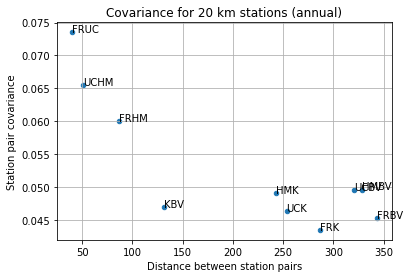

In [27]:
# basic plot
covariance_df.plot.scatter(x='separation_distance', y='covariance', c='tab:blue',
                               title="Covariance for 20 km stations (annual)")
plt.grid()
plt.xlabel("Distance between station pairs")
plt.ylabel("Station pair covariance")
# plt.xlim(0, 800)
# plt.ylim(0.02, 0.08)
# plot labels on points
for i, txt in enumerate(covariance_df.station_pair):
    plt.annotate(txt, (covariance_df.separation_distance.iat[i], covariance_df.covariance.iat[i]))
plt.show
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\covariance\covariance_20km_stns.png')

## Below are various attempts to fit an exponential curve to the covariance data

### Attempt 7: generate an array of separation distances in a range [0,350] with an interval of 10 or 20 (e.g. np.arange); for each of these distances, calculate an estimated covariance using the exponential function [sill * exp(-h / range) + nugget]. Plot these estimated covariances vs separation distance (as a line) on the same graph as the observations.

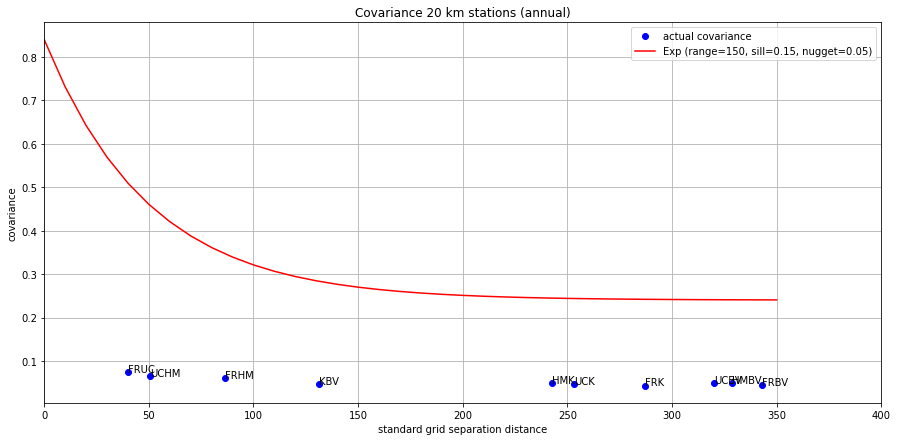

In [62]:
# use type_exp function from covariancefunction.py
# create a range of separation distances from 0 to 350
distarr = np.arange(0, 360, 10)
# set parameter values for exponential curve fitting
Range = 50
Sill = 0.6
nugget = 0.4

# actual values from dataframe
x = covariance_df.separation_distance.values
y = covariance_df.covariance.values

# create a function that loops through sepdist values and calculates an estimated covariance for each
def type_exp(): 
    covlist = [] # empty list for estimated covariance values from exponential function
    for h in distarr:    
        expfit = Sill * (np.exp(-h/Range) + nugget) # fit exponential curve
        covlist.append(expfit) # append covariance values to the list
    return covlist

# create array of exponential curve estimated covariance values
yexp = np.array(type_exp())
    
# plot actual covariance values
plt.figure(figsize=(15, 7))
plt.plot(x, y, 'bo', label="actual covariance")
# plot exponential curve values
plt.plot(distarr, yexp, 'r', label="Exp (range=150, sill=0.15, nugget=0.05)")
# plotting
plt.title("Covariance 20 km stations (annual)")
plt.xlabel('standard grid separation distance')
plt.ylabel('covariance')
plt.legend()
plt.xlim(0, 400)
# plt.ylim(0, 0.16)
plt.grid()

# reset df index to get access to station_pair column
# covariance_df = covariance_df.reset_index()

# plot labels on points
for i, txt in enumerate(covariance_df.station_pair):
    plt.annotate(txt, (covariance_df.separation_distance.iat[i], covariance_df.covariance.iat[i]))
plt.show()
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\covariance\covariance_jittered.png')

# print("sepdist = ", sepdist)
# print("h = ", h)
# print("yexp = ", yexp)

### From observation of the fig above, it looks like we have: nugget=0.05, sill=0.15, range=150. However, this gives a really poor fit. So, experiment with nugget, sill and range vals to get a better fit.

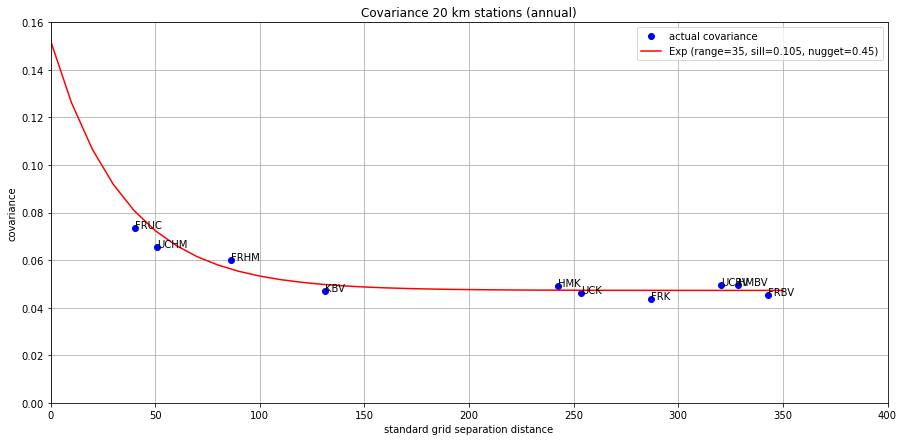

In [35]:
# use type_exp function from covariancefunction.py
# create a range of separation distances from 0 to 350
distarr = np.arange(0, 360, 10)
# set parameter values for exponential curve fitting
Range = 35
Sill = 0.105 # y-intercept estimated from the plotted cov values - nugget
nugget = 0.45

# actual values from dataframe
x = covariance_df.separation_distance.values
y = covariance_df.covariance.values

# create a function that loops through sepdist values and calculates an estimated covariance for each
def type_exp(): 
    covlist = [] # empty list for estimated covariance values from exponential function
    for h in distarr:    
        expfit = Sill * (np.exp(-h/Range) + nugget) # fit exponential curve
        covlist.append(expfit) # append covariance values to the list
    return covlist

# create array of exponential curve estimated covariance values
yexp = np.array(type_exp())
    
# plot actual covariance values
plt.figure(figsize=(15, 7))
plt.plot(x, y, 'bo', label="actual covariance")
# plot exponential curve values
plt.plot(distarr, yexp, 'r', label="Exp (range=35, sill=0.105, nugget=0.45)")
# plotting
plt.title("Covariance 20 km stations (annual)")
plt.xlabel('standard grid separation distance')
plt.ylabel('covariance')
plt.legend()
plt.xlim(0, 400)
plt.ylim(0, 0.16)
plt.grid()

# reset df index to get access to station_pair column
# covariance_df = covariance_df.reset_index()

# plot labels on points
for i, txt in enumerate(covariance_df.station_pair):
    plt.annotate(txt, (covariance_df.separation_distance.iat[i], covariance_df.covariance.iat[i]))
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\covariance\covariance_jittered.png')

### See nugget=0.01 and sill=0.99 and experiment with different range values - see what happens! Not a great fit!!

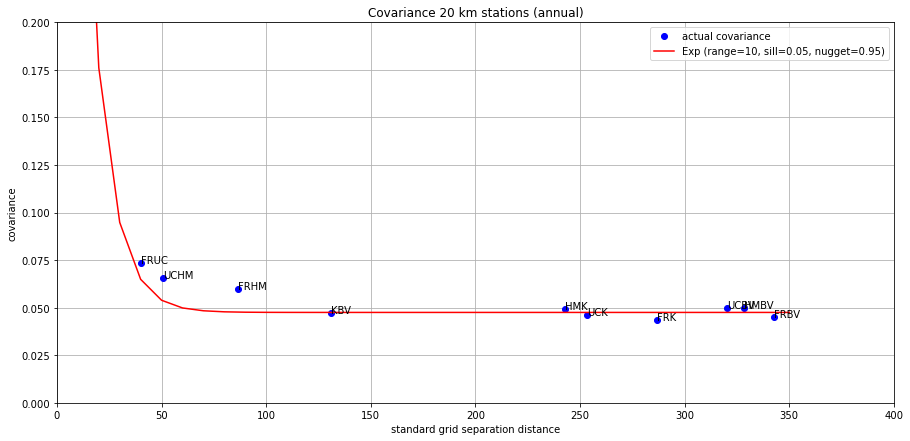

In [49]:
# use type_exp function from covariancefunction.py
# create a range of separation distances from 0 to 350
distarr = np.arange(0, 360, 10)
# set parameter values for exponential curve fitting
Range = 10
Sill = 0.95
nugget = 0.05

# actual values from dataframe
x = covariance_df.separation_distance.values
y = covariance_df.covariance.values

# create a function that loops through sepdist values and calculates an estimated covariance for each
def type_exp(): 
    covlist = [] # empty list for estimated covariance values from exponential function
    for h in distarr:    
        expfit = Sill * (np.exp(-h/Range) + nugget) # fit exponential curve
        covlist.append(expfit) # append covariance values to the list
    return covlist

# create array of exponential curve estimated covariance values
yexp = np.array(type_exp())
    
# plot actual covariance values
plt.figure(figsize=(15, 7))
plt.plot(x, y, 'bo', label="actual covariance")
# plot exponential curve values
plt.plot(distarr, yexp, 'r', label="Exp (range=10, sill=0.05, nugget=0.95)")
# plotting
plt.title("Covariance 20 km stations (annual)")
plt.xlabel('standard grid separation distance')
plt.ylabel('covariance')
plt.legend()
plt.xlim(0, 400)
plt.ylim(0, 0.2)
plt.grid()

# reset df index to get access to station_pair column
# covariance_df = covariance_df.reset_index()

# plot labels on points
for i, txt in enumerate(covariance_df.station_pair):
    plt.annotate(txt, (covariance_df.separation_distance.iat[i], covariance_df.covariance.iat[i]))
plt.show()
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\covariance\covariance_jittered.png')

### Attempt 6: (a) divide the approximate range (try different values between 150-300) by 3 (50-100) and (b) add an intercept (nugget) term (where the intercept is equal to the covariance after the curve has flattened out (i.e. at large distances (approx 0.045). The sill is still roughly the difference between where the curve would intersect the vertical axis and the intercept value (approx 0.080-0.045 = 0.035).
### Use scipy.optimize curve_fit

popt =  [ 1.         -0.45948921 -0.11668329]


C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


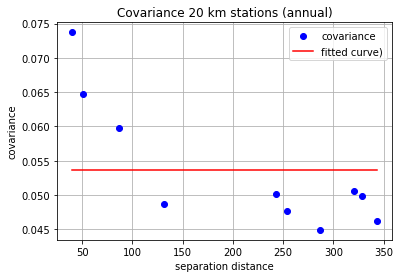

In [102]:
# function from covariancefunction.py
def type_exp(h, Range=100.0, Sill=0.035, nugget=0.045): # h = separation distance
    h = np.array(h)
    return Sill * (np.exp(-h/Range) + nugget)

h = covariance_df.separation_distance.values
y = covariance_df.covariance.values

# line plot sep dist v cov
plt.plot(h, y, 'bo', label='covariance')

# optimise curve fitting parameters
popt, pcov = curve_fit(type_exp, h, y)
print("popt = ", popt)

# Plot the fitted function
plt.plot(h, type_exp(h, *popt), 'r', label = 'fitted curve)')
plt.title("Covariance 20 km stations (annual)")
plt.xlabel('separation distance')
plt.ylabel('covariance')
plt.legend()
plt.grid()

popt =  [1.         0.03181917 1.67931394]


C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


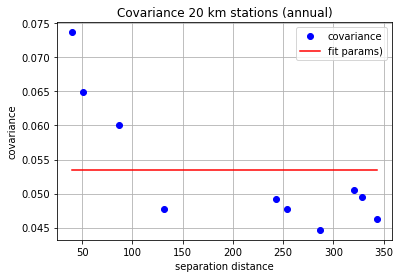

In [70]:
def func(x, a, b, c):
#     return a * np.exp(-b * x) + c
    return a * np.exp(-x / b)

x = covariance_df.separation_distance.values
y = covariance_df.covariance.values

# line plot sep dist v cov
plt.plot(h, y, 'bo', label='covariance')

# optimise curve fitting parameters
popt, pcov = curve_fit(type_exp, h, y)
print("popt = ", popt)

# Plot the fitted function
plt.plot(h, type_exp(h, *popt), 'r', label = 'fit params)')
plt.title("Covariance 20 km stations (annual)")
plt.xlabel('separation distance')
plt.ylabel('covariance')
plt.legend()
plt.grid()

### Attempt 5 - use np.polyfit and exp function taken from covariancefunction.py

[-7.12066376e-05  1.07010210e+00]


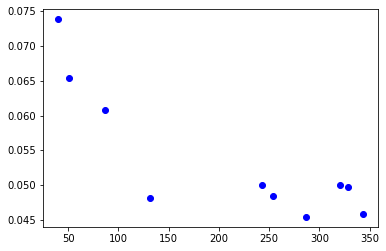

In [28]:
# function from covariancefunction.py
def type_exp(h, Range=200.0, Sill=0.04): # h = separation distance
    h = np.array(h)
    return Sill * (np.exp(-h/Range))

h = covariance_df.separation_distance.values
y = covariance_df.covariance.values

# line plot sep dist v cov
plt.plot(h, y, 'bo', label='covariance')


# fit = np.polyfit(h, np.log(y), 1)
fit = np.polyfit(h, np.exp(y), 1)

#view the output of the model
print(fit)

# function from covariancefunction.py
def type_exp(h, Range=200.0, Sill=0.04): # h = separation distance
    h = np.array(h)
    return Sill * (np.exp(-h/Range))

h = covariance_df.separation_distance.values
y = covariance_df.covariance.values
# print("h = ", h)
# print("y = ", y)

# line plot sep dist v cov
plt.plot(h, y, 'bo', label='covariance')

# optimise curve fitting parameters
popt, pcov = curve_fit(type_exp, h, y)
print("popt = ", popt)

# Plot the fitted function
plt.plot(h, type_exp(h, *popt), 'r', label = 'fit params)')
plt.title("Covariance 20 km stations (annual)")
plt.xlabel('separation distance')
plt.ylabel('covariance')
plt.legend()
plt.grid()

### Attempt 4: use np.polyfit (https://www.geeksforgeeks.org/how-to-do-exponential-and-logarithmic-curve-fitting-in-python/)

In [29]:
# from https://www.geeksforgeeks.org/how-to-do-exponential-and-logarithmic-curve-fitting-in-python/

x = covariance_df.separation_distance.values
y = covariance_df.covariance.values

ylog_data = np.log(y)
print("ylog_data = ", ylog_data)
  
curve_fit = np.polyfit(x, ylog_data, 1)
print("curve_fit = ", curve_fit)

ylog_data =  [-2.6058536  -2.7269967  -2.80121696 -3.03364185 -2.99488802 -3.02893043
 -3.09160674 -2.99614483 -3.00051225 -3.08260306]
curve_fit =  [-1.16820035e-03 -2.69290378e+00]


In [30]:
yfit = np.exp(-2.69) * np.exp(-1.17*x)
print("yfit = ", yfit)

yfit =  [2.81632157e-022 1.07702958e-027 8.50490831e-046 1.64092678e-068
 3.25325637e-125 1.20106290e-130 1.12323560e-147 1.31821467e-164
 7.60890348e-169 4.22459432e-176]


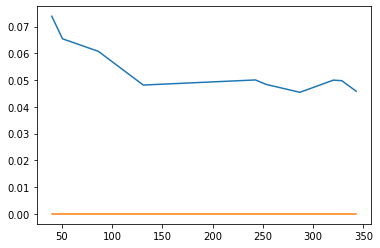

In [31]:
# Blue 
plt.plot(x, y)
  
# best fit in orange
plt.plot(x, yfit)

### Attempt 3: use scipy.optimize curve_fit with exp function from covariancefunction.py

popt =  [1. 1.]


C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


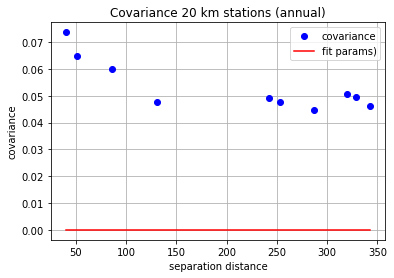

In [65]:
# function from covariancefunction.py
def type_exp(h, Range=200.0, Sill=0.04): # h = separation distance
    h = np.array(h)
    return Sill * (np.exp(-h/Range))

h = covariance_df.separation_distance.values
y = covariance_df.covariance.values
# print("h = ", h)
# print("y = ", y)

# line plot sep dist v cov
plt.plot(h, y, 'bo', label='covariance')

# optimise curve fitting parameters
popt, pcov = curve_fit(type_exp, h, y)
print("popt = ", popt)

# Plot the fitted function
plt.plot(h, type_exp(h, *popt), 'r', label = 'fit params)')
plt.title("Covariance 20 km stations (annual)")
plt.xlabel('separation distance')
plt.ylabel('covariance')
plt.legend()
plt.grid()

### Attempt 2: from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

x =  [ 40.11234224  50.7740091   86.40023148 131.10301293 242.6952822
 253.38705571 286.90067968 320.22023671 328.5620185  342.84107105]
y =  [0.07370321 0.06489255 0.06005902 0.04775    0.04920067 0.04779761
 0.04465565 0.05051196 0.04952362 0.04624939]
popt =  [1. 1.]


C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


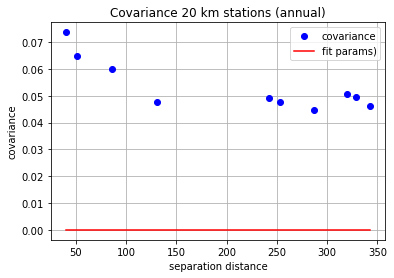

In [66]:
# from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# define exponential function
def func(x, a, b):
#     return a * np.exp(-b * x) + c
    return a * np.exp(-x / b)

# df column values (OptimizeWarning: Covariance of the parameters could not be estimated)
x = covariance_df.separation_distance.values
y = covariance_df.covariance.values
print("x = ", x)
print("y = ", y)

# # actual values copied from covariance dataframe (OptimizeWarning: Covariance of the parameters could not be estimated)
# x = np.array([40.112342, 50.774009, 86.400231, 131.103013, 242.695282,
#               253.387056, 286.900680, 320.220237, 328.562018, 342.841071])
# y = np.array([0.067498, 0.055741, 0.052797, 0.031940, 0.034051, 0.037048, 0.035967, 0.041194, 0.037360, 0.038492])
# print("x = ", x)
# print("y = ", y)

# tweak initial y values so they continually decrease (OptimizeWarning: Covariance of the parameters could not be estimated)
# x = np.array([40.112342, 50.774009, 86.400231, 131.103013, 242.695282,
#               253.387056, 286.900680, 320.220237, 328.562018, 342.841071])
# y = np.array([0.067498, 0.055741, 0.050797, 0.047940, 0.044051, 0.043048, 0.041967, 0.041194, 0.0405, 0.040])


# dummy values (on the exponential line) from my hand drawn plot (popt =  [9.45457462 0.91159492 0.52544126])
# x = np.array([0,  1.0, 2.0, 3.0, 4.00, 5.0, 6.00, 7.00])
# y = np.array([10, 4.2, 2.3, 1.0, 0.75, 0.6, 0.60, 0.55])
# print("x = ", x)
# print ("y = ", y)

# dummy values (either side of the exp line) from my hand drawn plot (popt =  [13.06592757  0.73905275  0.75296969])
# x = np.array([0.6, 1.8, 2.6, 5.2, 12.0])
# y = np.array([9.0, 5.2, 1.4, 1.6, 0.60])
# print("x = ", x)
# print ("y = ", y)

# line plot sep dist v cov
plt.plot(x, y, 'bo', label='covariance')

# optimise curve fitting parameters
popt, pcov = curve_fit(func, x, y)
print("popt = ", popt)

# set bounds on a, b and c
# popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
# print("popt = ", popt)

# Plot the fitted function
plt.plot(x, func(x, *popt), 'r', label = 'fit params)')
plt.title("Covariance 20 km stations (annual)")
plt.xlabel('separation distance')
plt.ylabel('covariance')
plt.legend()
plt.grid()
# plot labels on points
# for i, txt in enumerate(covariance_df.station_pair):
#     plt.annotate(txt, (covariance_df.separation_distance.iat[i], covariance_df.covariance.iat[i]))
plt.show()

# plt.plot(x, func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
# plt.plot(x, func(x, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# plt.title("Covariance 20 km stations (annual)")
# plt.xlabel("Distance between station pairs")
# plt.ylabel("Station pair covariance")
# plt.xlim(0, 500)
# # plt.ylim(0.4, 1.0)
# # plot labels on points
# for i, txt in enumerate(covariance_df.station_pair):
#     plt.annotate(txt, (covariance_df.separation_distance.iat[i], covariance_df.covariance.iat[i]))
# plt.show()
# # plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorrfit20km_annual.png')
# # show the equation of the fitted line
# print(model)

### Attempt 1: from https://www.youtube.com/watch?v=1H-SdMuJXTk

In [201]:
covariance_df

,station_pair,separation_distance,covariance
0,FRUC,40.112342,0.067498
1,UCHM,50.774009,0.055741
2,FRHM,86.400231,0.052797
3,KBV,131.103013,0.031940
4,HMK,242.695282,0.034051
5,UCK,253.387056,0.037048
6,FRK,286.900680,0.035967
7,UCBV,320.220237,0.041194
8,HMBV,328.562018,0.037360
9,FRBV,342.841071,0.038492


x =  [ 40.11234224  50.7740091   86.40023148 131.10301293 242.6952822
 253.38705571 286.90067968 320.22023671 328.5620185  342.84107105]
y =  [0.07370321 0.06489255 0.06005902 0.04775    0.04920067 0.04779761
 0.04465565 0.05051196 0.04952362 0.04624939]
popt =  [1. 1.]


C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


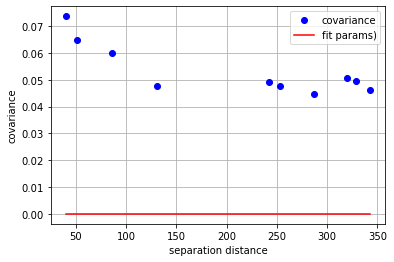

In [67]:
# define exponential function
def func(x, a, b):
    return a * np.exp(-b * x)
# actual x and y vals from covariance dataframe
x = covariance_df.separation_distance.values
y = covariance_df.covariance.values
print("x = ", x)
print ("y = ", y)

# actual values copied from covariance dataframe
# x = np.array([40.112342, 50.774009, 86.400231, 131.103013, 242.695282,
#               253.387056, 286.900680, 320.220237, 328.562018, 342.841071])
# y = np.array([0.067498, 0.055741, 0.052797, 0.031940, 0.034051, 0.037048, 0.035967, 0.041194, 0.037360, 0.038492])


# dummy values (on the exponential line) from my hand drawn plot
# x = np.array([0,  1.0, 2.0, 3.0, 4.00, 5.0, 6.00, 7.00])
# y = np.array([10, 4.2, 2.3, 1.0, 0.75, 0.6, 0.60, 0.55])
# print("x = ", x)
# print ("y = ", y)

# dummy values (either side of the exp line) from my hand drawn plot
# x = np.array([0.6, 1.8, 2.6, 5.2, 12.0])
# y = np.array([9.0, 5.2, 1.4, 1.6, 0.60])
# print("x = ", x)
# print ("y = ", y)


# line plot sep dist v cov
plt.plot(x, y, 'bo', label='covariance')

# Initial guess for parameters
# initguess = [1.0, 1.0]

# Fit the curve
# popt, pcov = curve_fit(func, x, y)
popt, pcov = curve_fit(func, x, y)
# popt, pcov = curve_fit(func, x, y, initguess)
print("popt = ", popt)

# x values for the fitted function
# xFit = np.arange(0.0, 350.0, 0.1)

# Plot the fitted function
plt.plot(x, func(x, *popt), 'r', label = 'fit params)')
plt.xlabel('separation distance')
plt.ylabel('covariance')
plt.grid()
# plt.xlim(0, 350)
# plt.ylim(0.0, 0.10)
plt.legend()
plt.show()

### Practise curve fitting using dummy data

popt =  [2.30144782 1.14004412 0.5401658 ]


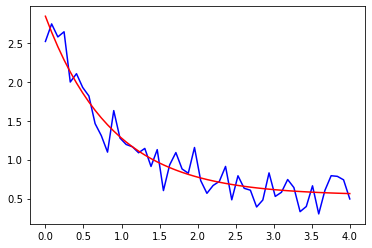

In [200]:
# dummy example from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
print("popt = ", popt)

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

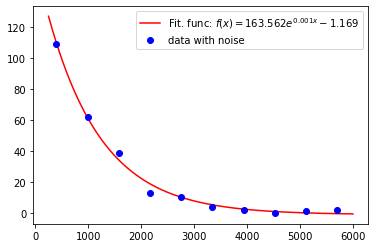

In [95]:
# dummy example
# from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

# define type of function to search
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

# sample data
x = np.array([399.75, 989.25, 1578.75, 2168.25, 2757.75, 3347.25, 3936.75, 4526.25, 5115.75, 5705.25])
y = np.array([109,62,39,13,10,4,2,0,1,2])

# curve fit
p0 = (1.,1.e-5,1.) # starting search koefs
opt, pcov = curve_fit(model_func, x, y, p0)
a, k, b = opt
# test result
x2 = np.linspace(250, 6000, 250)
y2 = model_func(x2, a, k, b)
fig, ax = plt.subplots()
ax.plot(x2, y2, color='r', label='Fit. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b))
ax.plot(x, y, 'bo', label='data with noise')
ax.legend(loc='best')
plt.show()

### Plot code in case it's needed

In [32]:
# # line fitting using polyfit (from Steps5n6_corr_gauges_daily_ts_2005-16.ipynb)
# x = covariance_df.separation_distance
# y = covariance_df.covariance
# # # polynomial fit with degree = 1.5
# # model = np.poly1d(np.polyfit(x, y, 1.5))
# # # add fitted polynomial line to scatterplot
# # polyline = np.linspace(1, 500, 10)
# plt.scatter(x, y)
# # plt.plot(polyline, model(polyline))
# plt.grid()
# plt.title("Covariance 20 km stations (annual)")
# plt.xlabel("Distance between station pairs")
# plt.ylabel("Station pair covariance")
# plt.xlim(0, 500)
# # plt.ylim(0.4, 1.0)
# # plot labels on points
# for i, txt in enumerate(covariance_df.station_pair):
#     plt.annotate(txt, (covariance_df.separation_distance.iat[i], covariance_df.covariance.iat[i]))
# plt.show()
# # plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\distcorrfit20km_annual.png')
# # show the equation of the fitted line
# print(model)